# Project: Investigate a Dataset "TMDb movie data"

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset that we have selected for analysis is the data set "TMDb movie data".
It contains information about 10,000 movies collected from The Movie Database (TMDb)
including user ratings and revenue. <br>

> The data provided is suitable for analysis and we use it to analyze trends in the movie industry, genres popularity, common characteristics of the profitable movies, however we have to make an important note:<br>

> NOTE: Machine learning or Inferential statistics are not used. <br> 
> All findings below are tentative and subject to furhter discussions in a wide and open topic, which is the full analysis of this database.<br>



In [299]:
# Importing necessary packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

>Lets load the data and make the first preview of the database

In [300]:
#Read the CSV file and preview
df = pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47


>Loading more info in regards with the columns, types, size and non-null values

In [301]:
#data frame - info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

>Basic statistical information for the numerical columns

In [302]:
#data frame - describe
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


> **OBSERVATIONS**


>1.**Columns**. <br>
>We will drop the columns named: id, imdb_id, homepage, tagline and overview. The reasons we justify below: <br> 
>>  1.1 The two index columns ('id', 'imdb_id') can not contribute to our analisys <br>
>>  1.2 The 'homepage' column have ~8000 missing values in it. <br>
>>  1.3 The 'tagline' is just a slogan and we perfectly identify the movie by its title alone. <br>
>>  1.4.The 'overview' might help the eventual watcher, but not us.  <br>
>
>2.**Formats** <br>
>We will need to convert columns to different format for our analysis.<br>
>>  2.1 We have complex numbers (scientific format) in the dataset, we will go for integers in the analysis. <br> 
>>  2.2 Relase dates are not in format which is easy to analyse, we will aim for (YYYY-MM-DD) format. <br> 
>
>3.**Values** <br>
>Some column values will need split, others we will replace with mean value. <br>
>>  3.1 Columns 'cast', 'director', 'genres' & 'production_companies' have multiple values and a separator. <br>
>>We will need to separate them, if they are to be included in further analysis. <br>
>>  3.2 We have a lot of "0" values and NaN values in the dataset, they will be replaced with mean or dropped. <br>
>>*Zeros are especially present in the budget_adj and revenue_adj columns*. <br>
>


> 4.**What will we analyze :**


>>4.1 We will vizualise three trends in the movie industry with the data provided (raising movies released per year, raising popularity of the movies and raising adjusted profit). <br>
>>4.2 We will find out what is the genre that has the most movies released ever, also what are the genres of the most popular movies for the last five years. <br>
>>4.3 We will analyze Profitable Movies, by looking at runtime, genres, actors, directors and budgets of the most profitable movies in the database. <br>


### Data Cleaning

>We will drop the columns, as stated in our indroduction.

In [303]:
#Droping columns id,imdb_id,homepage,tagline,overview
df.drop(['id','imdb_id','homepage','tagline','overview'], axis=1, inplace=True)


In [304]:
#Preview of the dataframe after the drop
df.head()



,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47


>We have to check for duplicates in our data and remove them.

In [305]:
#Checking the duplicate count
print("We have a total of {} duplicated value/s in the data, we will need to drop them.".format(df.duplicated().sum()))


We have a total of 1 duplicated value/s in the data, we will need to drop them.


In [306]:
#Dedupe and re-check
df.drop_duplicates(inplace = True)
print("We now have a total of {} duplicated value/s in the data.".format(df.duplicated().sum()))

We now have a total of 0 duplicated value/s in the data.


>We will check for NaN values and Zeros in the next two steps:

In [307]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


#check the counts and distribution of the NaN values from the dataset
print("Count of NaN values is as printed below:\n ")
df.isna().sum()



Count of NaN values is as printed below:
 


popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [308]:
#check of the "0' values and their distrubtion in the dataset
print("Count of 0 values is as printed below: \n")
df.isin([0]).sum()


Count of 0 values is as printed below: 



popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                       0
director                   0
keywords                   0
runtime                   31
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

> Firstly, we want to deal with the "0" values in our "budget", "revenue", "budget_adj" and "revenue_adj" columns. <br>
> Based on our experience up to now, we have two possible approaches under our belt to deal with them : <br>
>>1. To drop them
>>2. To replace them with mean or other value.
>
>
>*Please have in mind that for the purpose of this analysis we will replace the Zeros from these columns with the mean value. <br> The difference / the impact on the final results of the analysis, when chooseing replacing over droping of these values, is not a subject of the analysis.

In [309]:
#We are replacing the 0`s in each column with the mean for each column below:

df['budget'] = df['budget'].replace(0,df['budget'].mean())
df['revenue'] = df['revenue'].replace(0,df['revenue'].mean())
df['budget_adj'] = df['budget_adj'].replace(0,df['budget_adj'].mean())
df['revenue_adj'] = df['revenue_adj'].replace(0,df['revenue_adj'].mean())


#we should have 0`s left in the runtime column only and we perform print to confirm
print("Checking the database after replacing the 0`s in the above discussed columns with the mean value :")
df.isin([0]).sum()

Checking the database after replacing the 0`s in the above discussed columns with the mean value :


popularity               0
budget                   0
revenue                  0
original_title           0
cast                     0
director                 0
keywords                 0
runtime                 31
genres                   0
production_companies     0
release_date             0
vote_count               0
vote_average             0
release_year             0
budget_adj               0
revenue_adj              0
dtype: int64

>We see that now only 1 column have Zeros as value. <br> We will replace those with NaN and check for all other NaNs across the data.

In [310]:
#Filling the 0`s in the 'runtime' column with NaN and checking ALL other NaN present across the DB
df['runtime'] = df['runtime'].replace(0,np.NAN)
df.isna().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                   31
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> We will drop All the NaN values from our data before analyzing it.

In [311]:
#Droping all NaN values

df.dropna(inplace=True)
df.isna().sum()


popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

> This confirms there are no NaN values anymore. We can go into the necessary actions to fix the types.

In [312]:
#Display initial types
print('Database types initial : ')
display(df.dtypes) 

#Converting
df['budget'] = df['budget'].astype(int) 
df['revenue'] = df['revenue'].astype(int)
df['budget_adj'] = df['budget_adj'].astype(int) 
df['revenue_adj'] = df['revenue_adj'].astype(int)

#Display the changed types
print('Database types after changes')
display(df.dtypes) 

Database types initial : 


popularity              float64
budget                  float64
revenue                 float64
original_title           object
cast                     object
director                 object
keywords                 object
runtime                 float64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

Database types after changes


popularity              float64
budget                    int32
revenue                   int32
original_title           object
cast                     object
director                 object
keywords                 object
runtime                 float64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj                int32
revenue_adj               int32
dtype: object

> This confirms the change of the types. We continue with the dates.

In [313]:
#Changing the dates with pd.to_datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors = 'ignore')

#preview of the data after change
df.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.00,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,137999939,1392445892
1,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.00,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.10,2015,137999939,348161292
2,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.00,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.30,2015,101199955,271619025
3,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.00,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.50,2015,183999919,1902723129
4,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137.00,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.30,2015,174799923,1385748801


> We can see that the dates format changed to more suitable for analysis (YYYY-MM-DD).

>
>
>We now want to continue with creating columns for profits ('profit' and 'profit_adj), <br> 
>because we currently have only budget and revenue column and do not want to calculate their <br>
>corresponding profit every time we need it into the analysis.

In [314]:
# Creating profit and adj profit columns
df['profit'] = df['revenue'] - df['budget']
df['profit_adj'] = df['revenue_adj'] - df['budget_adj']
df.head(10)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
0,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.00,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,137999939,1392445892,1363528810,1254445953
1,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.00,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.10,2015,137999939,348161292,228436354,210161353
2,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.00,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.30,2015,101199955,271619025,185238201,170419070
3,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.00,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.50,2015,183999919,1902723129,1868178225,1718723210
4,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137.00,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.30,2015,174799923,1385748801,1316249360,1210948878
5,9.11,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,father-son relationship|rape|based on novel|mo...,156.00,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.20,2015,124199945,490314247,397950503,366114302
6,8.65,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,saving the world|artificial intelligence|cybor...,125.00,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2015-06-23,2598,5.80,2015,142599937,405355075,285603537,262755138
7,7.67,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,based on novel|mars|nasa|isolation|botanist,141.00,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.60,2015,99359956,547749654,487380321,448389698
8,7.40,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,assistant|aftercreditsstinger|duringcreditssti...,91.00,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.50,2015,68079970,1064192016,1082730962,996112046
9,6.33,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,dream|cartoon|imaginary friend|animation|kid,94.00,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,2015-06-09,3935,8.00,2015,160999929,785411574,678708609,624411645


> We again confirm our changes into the columns with a preview of the database.

> We print the infromation for the cleaned database that we have now.


In [315]:
#Cleaned database - info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8659 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            8659 non-null   float64       
 1   budget                8659 non-null   int32         
 2   revenue               8659 non-null   int32         
 3   original_title        8659 non-null   object        
 4   cast                  8659 non-null   object        
 5   director              8659 non-null   object        
 6   keywords              8659 non-null   object        
 7   runtime               8659 non-null   float64       
 8   genres                8659 non-null   object        
 9   production_companies  8659 non-null   object        
 10  release_date          8659 non-null   datetime64[ns]
 11  vote_count            8659 non-null   int64         
 12  vote_average          8659 non-null   float64       
 13  release_year     

>Now lets plot some histograms of our dataframe for final step of that phase.

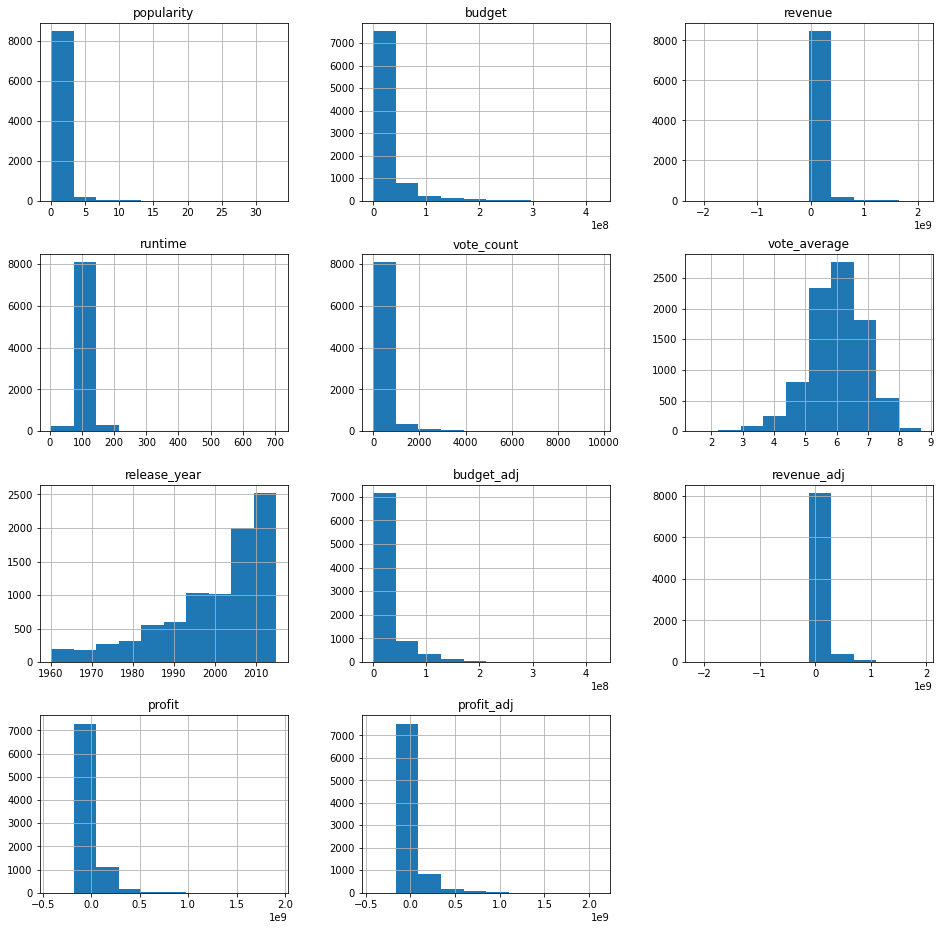

In [316]:
#before going deeper into the df and for final step here we will plot a hist of the df
df.hist(figsize=(16,16));

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 -  Analyze trends in movie industry

>Lets visualize some trends in the Movie industry (movies released, movies popularity, movies profit) over the years.


Text(0, 0.5, 'Count of movies released')

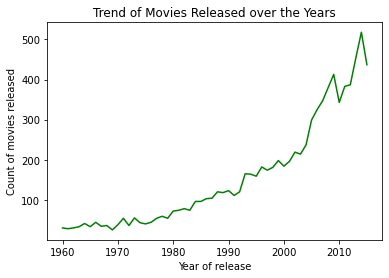

In [317]:
#Create df with the movie counts, grouped by year of release
df_counts_year = df.groupby(['release_year'], as_index=False)['original_title'].count()

#Plot
plt.plot(df_counts_year['release_year'],df_counts_year['original_title'], color='green')

#Set title of the plot and label for x and y axis
plt.title('Trend of Movies Released over the Years')
plt.xlabel('Year of release', fontsize = 10)
plt.ylabel('Count of movies released', fontsize = 10)

Text(0, 0.5, 'Mean popularity of movies released')

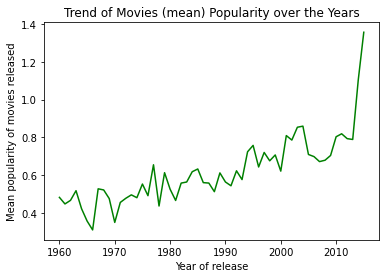

In [318]:
#Create df with the movie (mean) popularity, grouped by year of release
df_popularity_mean = df.groupby('release_year', as_index=False)['popularity'].mean()

#Plot
plt.plot(df_popularity_mean['release_year'],df_popularity_mean['popularity'], color='green')

#Set title of the plot and label for x and y axis
plt.title('Trend of Movies (mean) Popularity over the Years')
plt.xlabel('Year of release', fontsize = 10)
plt.ylabel('Mean popularity of movies released', fontsize = 10)

Text(0, 0.5, 'Profit adj to inflation')

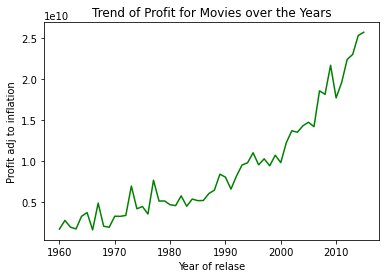

In [319]:
#Create df with the movie (adj) profits, grouped by year of release
df_profits_adj = df.groupby('release_year', as_index=False)['profit_adj'].sum()

#Plot
plt.plot(df_profits_adj['release_year'],df_profits_adj['profit_adj'], color='green')

#Set title of the plot and label for x and y axis
plt.title('Trend of Profit for Movies over the Years')
plt.xlabel('Year of relase', fontsize = 10)
plt.ylabel('Profit adj to inflation', fontsize = 10)

> We can give a short answer to that : "Movies released", "Mean Movie Popularity" and "Profit for Movies over the Years" are all in a raising trend. <br>
> If we focus more on the Popularity trend -  we can see, that it is raising exponentially in the last five years. <br>
>Lets find out what genres are contributing to this sharp raise in popularity of the movies for the last five years.


### Research Question 2 : Analyze Genres Popularity

>Lets analyze the genres popularity, over the years and for the last years. <br>
>We will answer: <br>
>Which genre has the most films released, ever? <br>
>Which genres are the most popular movies for the last 5 years? 

>For this, we first make a deeper dive into the values of the genres column.

In [320]:
#Counting values in 'genres'column 
df['genres'].groupby(df['genres']).count()


genres
Action                                     42
Action|Adventure                           12
Action|Adventure|Animation                  4
Action|Adventure|Animation|Comedy|Drama     1
Action|Adventure|Animation|Drama|Family     1
                                           ..
Western|Drama|Crime|Romance                 1
Western|History                             1
Western|History|War                         1
Western|Horror|Thriller                     1
Western|Thriller                            1
Name: genres, Length: 1783, dtype: int64

>As we see (and as discussed above into the introductory party) the initial data from that column will need to be split before furhter analysis. <br>

>We do so in the next steps.

In [321]:
#Split genres column and preview the result dataframe
df_split_genre = df.assign(genres = df['genres'].str.split('|')).explode('genres')
df_split_genre.head(10)


,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
0,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.00,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,137999939,1392445892,1363528810,1254445953
0,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.00,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,137999939,1392445892,1363528810,1254445953
0,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.00,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,137999939,1392445892,1363528810,1254445953
0,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.00,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.50,2015,137999939,1392445892,1363528810,1254445953
1,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.00,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.10,2015,137999939,348161292,228436354,210161353
1,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.00,Adventure,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.10,2015,137999939,348161292,228436354,210161353
1,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.00,Science Fiction,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.10,2015,137999939,348161292,228436354,210161353
1,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.00,Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.10,2015,137999939,348161292,228436354,210161353
2,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.00,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.30,2015,101199955,271619025,185238201,170419070
2,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.00,Science Fiction,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.30,2015,101199955,271619025,185238201,170419070


In [322]:
#Finding the Max Ever produced count and putting into temp df
df_max_ever = df_split_genre.genres.value_counts()

#Renaming the columns of the result dataframe
df_max_ever = df_max_ever.rename_axis('genre').reset_index(name='produced_count')

#Preview the results of the max ever produced
df_max_ever.head()


,genre,produced_count
0,Drama,3932
1,Comedy,3048
2,Thriller,2461
3,Action,2021
4,Romance,1414


> After spliting and analyzing the results, we see that the "Drama" genre is the one that have the most movies produced. It is followed by the Comedy, Thriller, Action and Romance.

>Lets visualize :

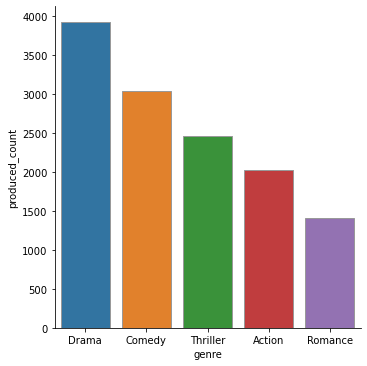

In [323]:
#Plot the 5 genres that are most often produced
sns.catplot(x = "genre", y="produced_count" , kind="bar",
             edgecolor=".6",
            data=df_max_ever.head());

>Now we focus on delivering results for popularity for the last 5 years.

In [324]:
#Find the biggest popularity for EVERY genre across the years
df1 = df_split_genre.groupby(['release_year', 'genres', ], as_index = False)['popularity'].max()
df1

,release_year,genres,popularity
0,1960,Action,1.87
1,1960,Adventure,1.87
2,1960,Comedy,0.95
3,1960,Crime,0.42
4,1960,Drama,2.61
...,...,...,...
1024,2015,Science Fiction,32.99
1025,2015,TV Movie,0.52
1026,2015,Thriller,32.99
1027,2015,War,5.48


In [325]:
#Find the biggest popularity for the specific year, no matter the genre
df2 = df_split_genre.groupby(['release_year'], as_index = False)['popularity'].max()
max_pop= df2['popularity']
max_pop

0     2.61
1     2.63
2     3.17
3     2.51
4     3.15
5     1.91
6     1.23
7     2.55
8     3.31
9     1.78
10    1.94
11    3.07
12    5.74
13    2.27
14    3.26
15    3.26
16    2.58
17   12.04
18    1.70
19    4.94
20    5.49
21    4.58
22    4.22
23    4.83
24    4.83
25    6.10
26    2.49
27    3.47
28    3.78
29    4.14
30    2.68
31    3.85
32    4.59
33    2.57
34    8.09
35    4.77
36    4.48
37    4.36
38    4.18
39    8.95
40    4.27
41    8.58
42    8.10
43    7.12
44    5.83
45    5.94
46    5.84
47    4.97
48    8.47
49    9.43
50    9.36
51    7.96
52    7.64
53    6.11
54   24.95
55   32.99
Name: popularity, dtype: float64

In [326]:
#Finding the genres that match the biggest popularity for the current year
df_result = df1[df1['popularity'].isin(max_pop)]
df_result

,release_year,genres,popularity
4,1960,Drama,2.61
8,1960,Horror,2.61
12,1960,Thriller,2.61
16,1961,Adventure,2.63
17,1961,Animation,2.63
...,...,...,...
1005,2014,Science Fiction,24.95
1010,2015,Action,32.99
1011,2015,Adventure,32.99
1024,2015,Science Fiction,32.99


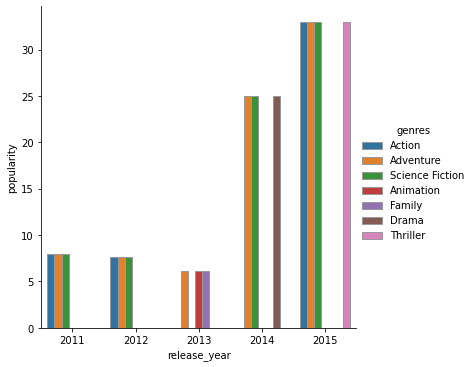

In [327]:
#Filtering for the last 5 years of the popular genres
df_edited = df_result[df_result['release_year'] > 2010]
df_edited

#Plot the results from the final database
sns.catplot(x = "release_year", y="popularity" , hue= "genres" , kind="bar",
             edgecolor=".6",
            data=df_edited);

>We can see the list of the most popular genres for the last five years and make a quick obesrvation: <br>
>> "Adventure" genre is present as a result for all of them. <br>
>> "Science Fiction" is present into 4 out of 5. <br>

### Research Question 3 : Analyze Profitable Movies

>Lets analyze the Top Profitable movies and try to find the some important ingredients needed to make such.

>For this, we will analyze the casts, the directors, the budgets, the runtime and the genre of a the top profitable slice of movies from our database.

>Lets return to our cleaned database and visualize some statistical data again

In [328]:
#fixing the sceintific display of numbers so that we can understand the figures better
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#visualizing the databases statistical info
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,profit_adj
count,8659.00,8659.00,8659.00,8659.00,8659.00,8659.00,8659.00,8659.00,8659.00,8659.00,8659.00
mean,0.74,24367494.10,67682869.71,103.90,264.40,6.00,2000.12,29297725.36,85954841.35,43811387.54,58641163.71
std,1.09,30746449.77,121995395.30,26.05,635.42,0.89,13.22,33371276.28,149508370.90,102267050.03,130907060.93
min,0.00,1.00,-2147483648.00,3.00,10.00,1.50,1960.00,0.00,-2147483648.00,-413912431.00,-413912431.00
25%,0.25,14624286.00,32001269.00,91.00,21.00,5.50,1993.00,17549894.00,44129810.50,8910410.50,12638271.50
50%,0.45,14624286.00,39826896.00,100.00,54.00,6.10,2004.00,17549894.00,51369001.00,25202610.00,33819107.00
75%,0.84,21000000.00,39826896.00,113.00,200.00,6.60,2011.00,28133578.50,55126196.00,33520757.00,45012948.50
max,32.99,425000000.00,2068178225.00,705.00,9767.00,8.70,2015.00,425000000.00,1907005841.00,1910483648.00,2108194372.00


>We want to focus on the Highest profitable movies. Our initial plan was to take the 4th Quartile of the database. <br>
>Howewver after deeper look, we can see that our fourth quartile of profitables starts at "only" 33 million of profit. <br> 
>In the same time the most profitable one delivers a number near 2 billion. <br>

>So, we will increase that profit number siginificantly and target the real high achievers form the database <br> 

> Lets pick the movies with profits in the likes of 250 million or more and start analyzing them below.

In [329]:
#creating "profitables dataframe" containing ONLY movies with HIGH profits (>200 000 000)
profitables = df[df['profit'] >= 200000000]                    
print("So, the movies with 200 000 000 in profits (or more) are total {} in count.".format(profitables.count()['original_title']))

So, the movies with 200 000 000 in profits (or more) are total 397 in count.


In [330]:
#Finding the Average budget of the Highest Profitable Movies and rounding it
avg_budget = round(profitables['budget'].mean())

print("The Average budget of these Highest Profitable Movies is {} USD.".format(avg_budget))

The Average budget of these Highest Profitable Movies is 94275245 USD.


In [331]:
#Finding the Average runtime of the Highest Profitable Movies and rounding it
avg_runtime = round(profitables['runtime'].mean())

print("And their Average runtime is {} min.".format(avg_runtime))

And their Average runtime is 119 min.


> Lets now analyzie some characteristics of the cast, genres and directors by finding the most frequent of them form the group of high profitables.

In [332]:
#Spliting the Genre and Cast columns of the profitable Database so that we can analyze them

#split Genres and safe in temporary dataframe
df_profitable_genres = profitables.assign(genres = profitables['genres'].str.split('|')).explode('genres')
#split Genres and safe in temporary dataframe
df_profitable_casts = profitables.assign(cast = profitables['cast'].str.split('|')).explode('cast')

In [333]:
#Counting the Genres and Cast Values in the split Databases

#Count of Genres from SPLIT database
df_profitable_genres_counts = df_profitable_genres.genres.value_counts()

#Count of Casts from SPLIT database
df_profitable_casts_counts = df_profitable_casts.cast.value_counts()

#Count of Directors from CLEAN database
#Explanation: Here is important to count from the cleaned (not split database),
#else we will count the duplicate values for directors generated by the split of other columns.
df_profitable_directors_counts = profitables.director.value_counts()

In [334]:
#Renaming the columns of the Genres Count Dataframe
df_profitable_genres_counts = df_profitable_genres_counts.rename_axis('genre').reset_index(name='count')

#Preview the results for top 3 in Genres Count
df_profitable_genres_counts.head(3)

,genre,count
0,Adventure,183
1,Action,172
2,Comedy,130


Most Popular Genres of the High Profitable Movies


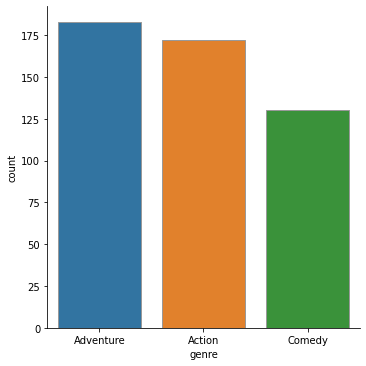

In [335]:
#Plot the 3 genres that are most often met in the Profitable Movies
print("Most Popular Genres of the High Profitable Movies")
sns.catplot(x = "genre", y="count" , kind="bar",
             edgecolor=".6",
            data=df_profitable_genres_counts.head(3));

In [336]:
#Renaming the columns of the Cast Count Dataframe
df_profitable_casts_counts = df_profitable_casts_counts.rename_axis('cast').reset_index(name='count')

#Preview the results for top 3 in Cast Count
df_profitable_casts_counts.head(3)

,cast,count
0,Tom Cruise,13
1,Tom Hanks,12
2,Harrison Ford,11


Most Popular Actors of the High Profitable Movies


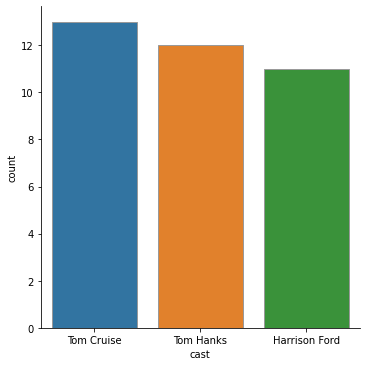

In [337]:
#Plot the 3 actors that are most frequently taking part into very Profitable Movies
print("Most Popular Actors of the High Profitable Movies")
sns.catplot(x = "cast", y="count" , kind="bar",
             edgecolor=".6",
            data=df_profitable_casts_counts.head(3));

In [338]:
#Renaming the columns of the Director Count Dataframe
df_profitable_directors_counts = df_profitable_directors_counts.rename_axis('director').reset_index(name='count')

#Preview the results for top 3 in Director Count
df_profitable_directors_counts.head(3)

,director,count
0,Steven Spielberg,16
1,Peter Jackson,7
2,Ron Howard,6


Most Popular Directors of the High Profitable Movies


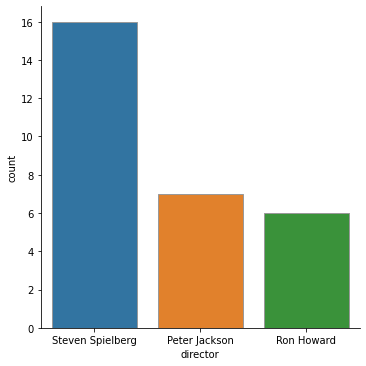

In [339]:
#Plot the 3 directors that are most included in Profitable Movies
print("Most Popular Directors of the High Profitable Movies")
sns.catplot(x = "director", y="count" , kind="bar",
             edgecolor=".6",
            data=df_profitable_directors_counts.head(3));

>So, our short answer for someone trying to hit the TOP PROFIT movie recipe, would be : <br>
>
>"Aim to release an Action, Adventure Movie or Comedy Movie with a runtime of arround 120 minutes, that include Tom Cruise / Tom Hanks / Harrison Ford and better give the project to Steven Spielberg, Peter Jackson or Ron Howard accompanied with atleast 100 millions of budget.

>Note: As stated above "our conclusions are not final and are subject to deeper analysis with more advanced techniques".

<a id='conclusions'></a>
## Conclusions

> The Movie Industry is RED HOT. <br>
> Movies are more profitable, more popular and there are more and more of them released over the years. <br>
> Drama Movies are the ones released the most over the years, but in the recent five years Adventure and Science Fiction Movies are gaining popularity. <br>
> Overall movie popularity for the recent five years is raising extremy fast. <br>
> Same Actors / Directors are often behind the most of the profitable movies, for example : Steven Spielberg Directed 16 of the 397 most profitable movies. <br>
> Adventure genre is at the Top of "Most frequent Genre between the Highest Profitable Movies". <br>
> The average budget for a profitable movie is sitting arround 100 000 000 USD, by the time of the analysis.<br>